# DS-GA 1001 Project
## Model and Evaluation (Part 2 Window Length 3)

This script contains feature selection, model selection, evaluation and comparison
***

## 1. Read Data

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import warnings
warnings.filterwarnings("ignore")

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
folder_name = 'Part2_Win3_Data'
data_name = 'Part2_Win3'

In [0]:
train = pd.read_csv(f"drive/My Drive/1001 Project/{folder_name}/{data_name}_train_scale.csv")
val = pd.read_csv(f"drive/My Drive/1001 Project/{folder_name}/{data_name}_val_scale.csv")
test = pd.read_csv(f"drive/My Drive/1001 Project/{folder_name}/{data_name}_test_scale.csv")

In [0]:
x_feature = ['mat_time', 'balance_orig_time', 'balance_time', 'LTV_orig_time',
       'LTV_time', 'interest_rate_time', 'Interest_Rate_orig_time', 'hpi_time',
       'hpi_orig_time', 'gdp_time', 'uer_time', 'FICO_orig_time',
       'payment_hist', 'avg_payment', 'std_payment', 'max_payment',
       'min_payment', 'count_zero_payment', 'count_low_payment',
       'REtype_CO_orig_time', 'REtype_PU_orig_time', 'REtype_SF_orig_time',
       'investor_orig_time']

In [0]:
y_feature = 'default'

In [0]:
train_pos = train[train['default']==1]
train_neg = train[train['default']==0]
val_pos = val[val['default']==1]
val_neg = val[val['default']==0]
test_pos = test[test['default']==1]
test_neg = test[test['default']==0]

In [0]:
np.random.seed = 1211
train_neg = train_neg.iloc[np.random.choice(len(train_neg), int(len(train_neg)*0.2121), replace=False),:]
val_neg = val_neg.iloc[np.random.choice(len(val_neg), int(len(val_neg)*0.2121), replace=False),:]
test_neg = test_neg.iloc[np.random.choice(len(test_neg), int(len(test_neg)*0.2121), replace=False),:]

In [0]:
train = pd.concat([train_neg,train_pos], axis=0, ignore_index=True)
val = pd.concat([val_neg,val_pos], axis=0, ignore_index=True)
test = pd.concat([test_neg,test_pos], axis=0, ignore_index=True)

In [0]:
train = train.set_index('id')
val = val.set_index('id')
test = test.set_index('id')

In [0]:
train['default'].value_counts()

0    9536
1    4088
Name: default, dtype: int64

## 2. Feature Selection

### 2.1 Correlation(HeatMap)

[Text(0.5, 0, 'mat_time'),
 Text(1.5, 0, 'balance_orig_time'),
 Text(2.5, 0, 'balance_time'),
 Text(3.5, 0, 'LTV_orig_time'),
 Text(4.5, 0, 'LTV_time'),
 Text(5.5, 0, 'interest_rate_time'),
 Text(6.5, 0, 'Interest_Rate_orig_time'),
 Text(7.5, 0, 'hpi_time'),
 Text(8.5, 0, 'hpi_orig_time'),
 Text(9.5, 0, 'gdp_time'),
 Text(10.5, 0, 'uer_time'),
 Text(11.5, 0, 'FICO_orig_time'),
 Text(12.5, 0, 'payment_hist'),
 Text(13.5, 0, 'avg_payment'),
 Text(14.5, 0, 'std_payment'),
 Text(15.5, 0, 'max_payment'),
 Text(16.5, 0, 'min_payment'),
 Text(17.5, 0, 'count_zero_payment'),
 Text(18.5, 0, 'count_low_payment'),
 Text(19.5, 0, 'REtype_CO_orig_time'),
 Text(20.5, 0, 'REtype_PU_orig_time'),
 Text(21.5, 0, 'REtype_SF_orig_time'),
 Text(22.5, 0, 'investor_orig_time'),
 Text(23.5, 0, 'default')]

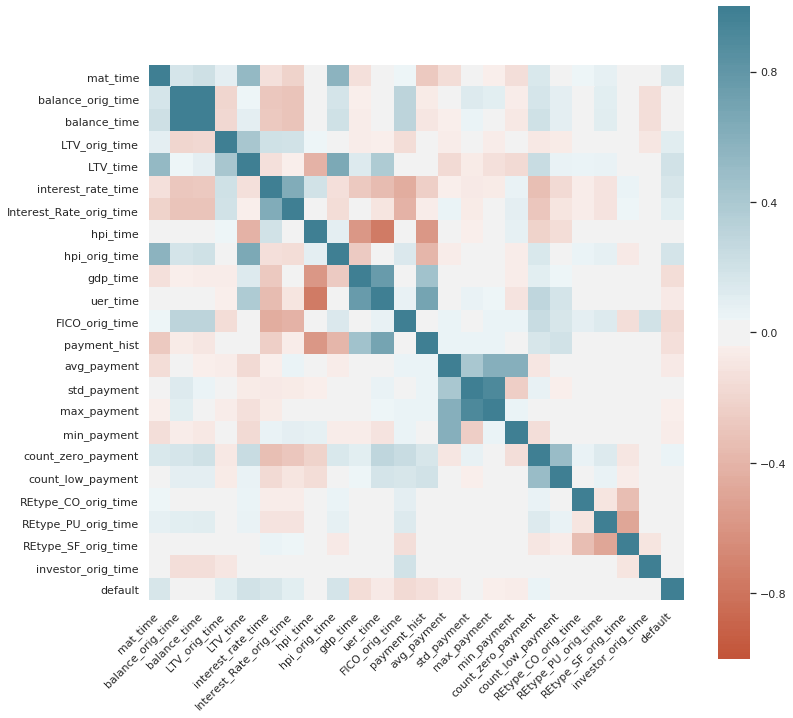

In [0]:
import seaborn as sns
sns.set(rc={'figure.figsize':(12,12)})

data = train[x_feature + [y_feature]]
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
)

In [0]:
corr_feature = corr['default'][abs(corr['default'])>0.05].index[:-1]

In [0]:
len(corr_feature)

12

### 2.2 Tree Based Selection

In [0]:
# # Reference
# from sklearn.feature_selection import SelectFromModel
# from sklearn.ensemble import RandomForestClassifier
# embeded_rf_selector = SelectFromModel(RandomForestClassifier(n_estimators=100,random_state=1211), max_features=23)
# embeded_rf_selector.fit(X, y)

# embeded_rf_support = embeded_rf_selector.get_support()
# embeded_rf_feature = X.loc[:,embeded_rf_support].columns.tolist()
# print(str(len(embeded_rf_feature)), 'selected features')
# display(embeded_rf_feature)

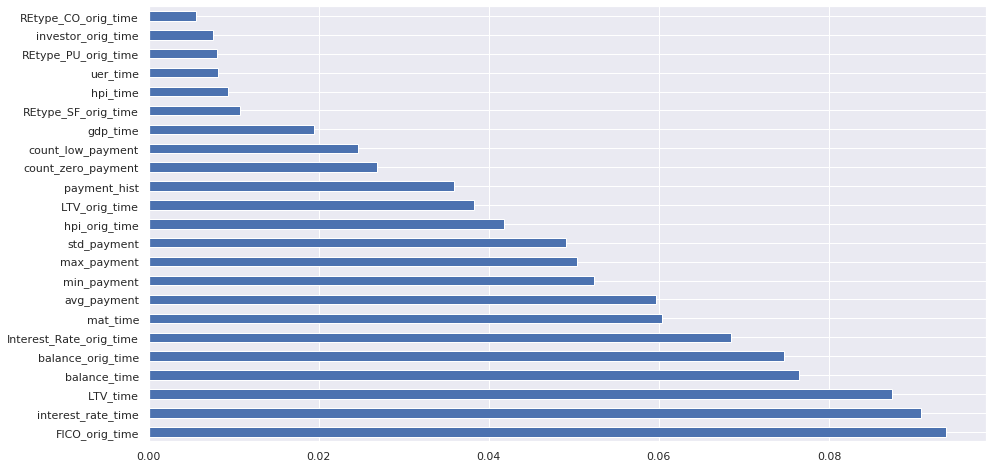

In [0]:
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
plt.figure(figsize=(15,8))

model = RandomForestClassifier(random_state=1211)
model.fit(train[x_feature],train[y_feature])
# print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=x_feature)
feat_importances.nlargest(23).plot(kind='barh')
plt.show()

Loop over features to see get the optimal number of features

In [0]:
feat = feat_importances.sort_values(ascending=False).index

In [0]:
from sklearn.metrics import f1_score, precision_score, recall_score, accuracy_score
from sklearn.linear_model import LogisticRegression
score = {}
for i in range(1, (len(feat)+1)):
    feature = feat[:i]
    X_train = train[feature]
    y_train = train[y_feature]
    X_val = val[feature]
    y_val = val[y_feature]
    logreg = LogisticRegression(random_state=1211)
    logreg.fit(X_train,y_train)
    y_pred=logreg.predict(X_val)
    # score[n] = np.mean(y_pred == y_val)
    score[i] = f1_score(y_val, y_pred)

In [0]:
# score # optimal features = top 18 features

Text(0.5, 1.0, 'Accuracy Rate Upon First n Most Important Features')

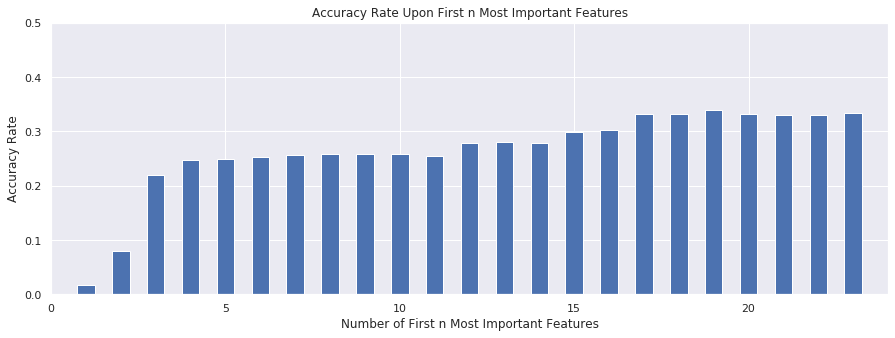

In [0]:
plt.figure(figsize=(15,5))
plt.bar(score.keys(), score.values(), width=.5, color='b')
plt.axis([0, 24, 0, 0.5])
plt.xlabel('Number of First n Most Important Features')
plt.ylabel('Accuracy Rate')
plt.title('Accuracy Rate Upon First n Most Important Features')

In [0]:
rf_feature = feat[:18]

In [0]:
X_train = train[feature]
y_train = train[y_feature]
X_val = val[feature]
y_val = val[y_feature]
X_test = test[feature]
y_test = test[y_feature]

In [0]:
X_train_fs = train[rf_feature]
X_val_fs = val[rf_feature]
X_test_fs = test[rf_feature]

## 3. Baseline Models

### Baseline 1: Random Classifier

In [0]:
from sklearn.metrics import classification_report, auc, precision_recall_curve

In [0]:
from sklearn.dummy import DummyClassifier
base_random = DummyClassifier(strategy = 'stratified', random_state=1211)
base_random.fit(X_train, y_train)
y_pred_base_random = base_random.predict(X_val)
y_pred_proba_base_random = base_random.predict_proba(X_val)[::,1]
precision_base_random, recall_base_random, thresholds_base_random = precision_recall_curve(y_val, y_pred_proba_base_random)
auc_base_random = auc(recall_base_random, precision_base_random)

print(classification_report(y_val, y_pred_base_random))
print('F1 score:', f1_score(y_val,y_pred_base_random))
print('Precision:', precision_score(y_val,y_pred_base_random))
print('Recall:', recall_score(y_val,y_pred_base_random))
print('AUPRC:', auc_base_random)
print('Accuracy:', accuracy_score(y_val,y_pred_base_random))

              precision    recall  f1-score   support

           0       0.70      0.71      0.70      2726
           1       0.30      0.29      0.29      1157

    accuracy                           0.58      3883
   macro avg       0.50      0.50      0.50      3883
weighted avg       0.58      0.58      0.58      3883

F1 score: 0.2942969090117544
Precision: 0.2964912280701754
Recall: 0.29213483146067415
AUPRC: 0.399772725876679
Accuracy: 0.5825392737574041


### Baseline 2: Logistics Regression

In [0]:
from sklearn.linear_model import LogisticRegression
base_log = LogisticRegression(random_state=1211)
base_log.fit(X_train,y_train)
y_pred_base_log = base_log.predict(X_val)
y_pred_proba_base_log = base_log.predict_proba(X_val)[::,1]
precision_base_log, recall_base_log, thresholds_base_log = precision_recall_curve(y_val, y_pred_proba_base_log)
auc_base_log = auc(recall_base_log, precision_base_log)

print(classification_report(y_val, y_pred_base_log))
print('F1 score:', f1_score(y_val,y_pred_base_log))
print('Precision:', precision_score(y_val,y_pred_base_log))
print('Recall:', recall_score(y_val,y_pred_base_log))
print('AUPRC:', auc_base_log)
print('Accuracy:', accuracy_score(y_val,y_pred_base_log))

              precision    recall  f1-score   support

           0       0.74      0.92      0.82      2726
           1       0.56      0.25      0.34      1157

    accuracy                           0.72      3883
   macro avg       0.65      0.58      0.58      3883
weighted avg       0.69      0.72      0.68      3883

F1 score: 0.3415514131088394
Precision: 0.5612648221343873
Recall: 0.24546240276577355
AUPRC: 0.4921994718126243
Accuracy: 0.7180015451970126


### Baseline 3: Decision Tree

In [0]:
from sklearn.tree import DecisionTreeClassifier
base_tree = DecisionTreeClassifier(random_state=1211)
base_tree.fit(X_train,y_train)
y_pred_base_tree = base_tree.predict(X_val)
y_pred_proba_base_tree = base_tree.predict_proba(X_val)[::,1]
precision_base_tree, recall_base_tree, thresholds_base_tree = precision_recall_curve(y_val, y_pred_proba_base_tree)
auc_base_tree = auc(recall_base_tree, precision_base_tree)

print(classification_report(y_val, y_pred_base_tree))
print('F1 score:', f1_score(y_val,y_pred_base_tree))
print('Precision:', precision_score(y_val,y_pred_base_tree))
print('Recall:', recall_score(y_val,y_pred_base_tree))
print('AUPRC:', auc_base_tree)
print('Accuracy:', accuracy_score(y_val,y_pred_base_tree))

              precision    recall  f1-score   support

           0       0.76      0.75      0.76      2726
           1       0.43      0.45      0.44      1157

    accuracy                           0.66      3883
   macro avg       0.60      0.60      0.60      3883
weighted avg       0.66      0.66      0.66      3883

F1 score: 0.43850720949957595
Precision: 0.43047460449625313
Recall: 0.44684528954191877
AUPRC: 0.5210704543587718
Accuracy: 0.6590265258820499


### Summary

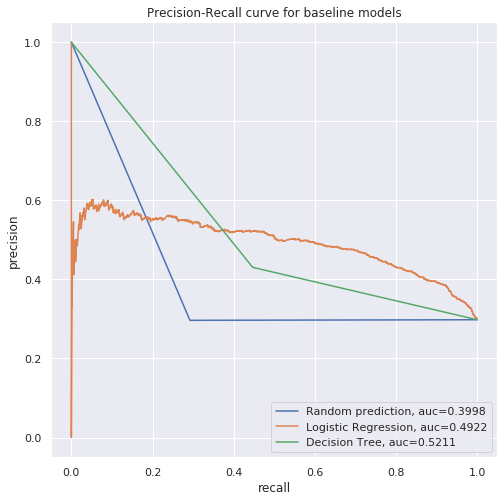

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(recall_base_random,precision_base_random,label="Random prediction, auc=%.4f" %auc_base_random)
plt.plot(recall_base_log,precision_base_log,label="Logistic Regression, auc=%.4f" %auc_base_log)
plt.plot(recall_base_tree,precision_base_tree,label="Decision Tree, auc=%.4f" %auc_base_tree)
plt.legend(loc=4)
plt.title('Precision-Recall curve for baseline models')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

## 4. Modeling

### Model 1: Logistic regression

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
parameters = {'penalty':('l1', 'l2', 'elasticnet'), 'C':[0.5, 1, 1.5]}
log = GridSearchCV(LogisticRegression(random_state=1211, class_weight='balanced', solver='saga',l1_ratio=0.5), parameters, scoring='f1')
log.fit(X_train,y_train)
print(log.best_params_)

{'C': 0.5, 'penalty': 'elasticnet'}


In [0]:
y_pred_log = log.predict(X_val)
y_pred_proba_log = log.predict_proba(X_val)[::,1]
precision_log, recall_log, thresholds_log = precision_recall_curve(y_val, y_pred_proba_log)
auc_log = auc(recall_log, precision_log)

print(classification_report(y_val, y_pred_log))
print('F1 score:', f1_score(y_val,y_pred_log))
print('Precision:', precision_score(y_val,y_pred_log))
print('Recall:', recall_score(y_val,y_pred_log))
print('AUPRC:', auc_log)
print('Accuracy:', accuracy_score(y_val,y_pred_log))

              precision    recall  f1-score   support

           0       0.84      0.66      0.74      2726
           1       0.47      0.71      0.57      1157

    accuracy                           0.67      3883
   macro avg       0.66      0.69      0.65      3883
weighted avg       0.73      0.67      0.69      3883

F1 score: 0.565856996236743
Precision: 0.4682899207248018
Recall: 0.7147796024200519
AUPRC: 0.49091741964046787
Accuracy: 0.6731908318310584


#### With Feature Selection

In [0]:
parameters = {'penalty':('l1', 'l2', 'elasticnet'), 'C':[0.5, 1, 1.5]}
log_fs = GridSearchCV(LogisticRegression(random_state=1211, class_weight='balanced', solver='saga',l1_ratio=0.5), parameters, scoring='f1')
log_fs.fit(X_train_fs,y_train)
print(log_fs.best_params_)

{'C': 1.5, 'penalty': 'l2'}


In [0]:
y_pred_log_fs = log_fs.predict(X_val_fs)
y_pred_proba_log_fs = log_fs.predict_proba(X_val_fs)[::,1]
precision_log_fs, recall_log_fs, thresholds_log_fs = precision_recall_curve(y_val, y_pred_proba_log_fs)
auc_log_fs = auc(recall_log_fs, precision_log_fs)

print(classification_report(y_val, y_pred_log_fs))
print('F1 score:', f1_score(y_val,y_pred_log_fs))
print('Precision:', precision_score(y_val,y_pred_log_fs))
print('Recall:', recall_score(y_val,y_pred_log_fs))
print('AUPRC:', auc_log_fs)
print('Accuracy:', accuracy_score(y_val,y_pred_log_fs))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      2726
           1       0.47      0.72      0.57      1157

    accuracy                           0.67      3883
   macro avg       0.66      0.69      0.65      3883
weighted avg       0.73      0.67      0.69      3883

F1 score: 0.567842605156038
Precision: 0.46733668341708545
Recall: 0.7234226447709594
AUPRC: 0.49056472123420697
Accuracy: 0.6719031676538759


### Model 2: SVC

In [0]:
from sklearn.svm import SVC
parameters = {'kernel':('rbf', 'sigmoid'), 'C':[0.8, 1, 2]}
svc = GridSearchCV(SVC(random_state=1211, probability=True, class_weight='balanced'), parameters, scoring='f1')
svc.fit(X_train,y_train)
print(svc.best_params_)

{'C': 2, 'kernel': 'rbf'}


In [0]:
y_pred_svc = svc.predict(X_val)
y_pred_proba_svc = svc.predict_proba(X_val)[::,1]
precision_svc, recall_svc, thresholds_svc = precision_recall_curve(y_val, y_pred_proba_svc)
auc_svc = auc(recall_svc, precision_svc)

print(classification_report(y_val, y_pred_svc))
print('F1 score:', f1_score(y_val,y_pred_svc))
print('Precision:', precision_score(y_val,y_pred_svc))
print('Recall:', recall_score(y_val,y_pred_svc))
print('AUPRC:', auc_svc)
print('Accuracy:', accuracy_score(y_val,y_pred_svc))

              precision    recall  f1-score   support

           0       0.86      0.63      0.73      2726
           1       0.46      0.75      0.57      1157

    accuracy                           0.67      3883
   macro avg       0.66      0.69      0.65      3883
weighted avg       0.74      0.67      0.68      3883

F1 score: 0.5745382585751979
Precision: 0.46453333333333335
Recall: 0.7528089887640449
AUPRC: 0.5176120186256341
Accuracy: 0.6677826422868915


#### With Feature Selection

In [0]:
from sklearn.svm import SVC
parameters = {'kernel':('rbf', 'sigmoid'), 'C':[0.8, 1, 2]}
svc_fs = GridSearchCV(SVC(random_state=1211, probability=True, class_weight='balanced'), parameters, scoring='f1')
svc_fs.fit(X_train_fs,y_train)
print(svc_fs.best_params_)

{'C': 0.8, 'kernel': 'rbf'}


In [0]:
y_pred_svc_fs = svc_fs.predict(X_val_fs)
y_pred_proba_svc_fs = svc_fs.predict_proba(X_val_fs)[::,1]
precision_svc_fs, recall_svc_fs, thresholds_svc_fs = precision_recall_curve(y_val, y_pred_proba_svc_fs)
auc_svc_fs = auc(recall_svc_fs, precision_svc_fs)

print(classification_report(y_val, y_pred_svc_fs))
print('F1 score:', f1_score(y_val,y_pred_svc_fs))
print('Precision:', precision_score(y_val,y_pred_svc_fs))
print('Recall:', recall_score(y_val,y_pred_svc_fs))
print('AUPRC:', auc_svc_fs)
print('Accuracy:', accuracy_score(y_val,y_pred_svc_fs))

              precision    recall  f1-score   support

           0       0.86      0.64      0.73      2726
           1       0.47      0.75      0.58      1157

    accuracy                           0.67      3883
   macro avg       0.66      0.70      0.65      3883
weighted avg       0.74      0.67      0.69      3883

F1 score: 0.5777777777777777
Precision: 0.468783638320775
Recall: 0.7528089887640449
AUPRC: 0.5204135765579521
Accuracy: 0.6721607004893124


### Model 3: Random Forest

In [0]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[50, 100, 150], 'max_depth':[5, 10, 15]}
rf = GridSearchCV(RandomForestClassifier(random_state=1211, oob_score=True, class_weight='balanced_subsample'), parameters, scoring='f1')
rf.fit(X_train,y_train)
print(rf.best_params_)

{'max_depth': 5, 'n_estimators': 50}


In [0]:
y_pred_rf = rf.predict(X_val)
y_pred_proba_rf = rf.predict_proba(X_val)[::,1]
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_val, y_pred_proba_rf)
auc_rf = auc(recall_rf, precision_rf)

print(classification_report(y_val, y_pred_rf))
print('F1 score:', f1_score(y_val,y_pred_rf))
print('Precision:', precision_score(y_val,y_pred_rf))
print('Recall:', recall_score(y_val,y_pred_rf))
print('AUPRC:', auc_rf)
print('Accuracy:', accuracy_score(y_val,y_pred_rf))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      2726
           1       0.47      0.73      0.57      1157

    accuracy                           0.67      3883
   macro avg       0.66      0.69      0.66      3883
weighted avg       0.74      0.67      0.69      3883

F1 score: 0.5737428282146473
Precision: 0.4706533776301218
Recall: 0.7346585998271391
AUPRC: 0.5342326922347691
Accuracy: 0.6747360288436776


#### With Feature Selection

In [0]:
from sklearn.ensemble import RandomForestClassifier
parameters = {'n_estimators':[50, 100, 150], 'max_depth':[5, 10, 15]}
rf_fs = GridSearchCV(RandomForestClassifier(random_state=1211, oob_score=True, class_weight='balanced_subsample'), parameters, scoring='f1')
rf_fs.fit(X_train_fs,y_train)
print(rf_fs.best_params_)

{'max_depth': 5, 'n_estimators': 50}


In [0]:
y_pred_rf_fs = rf_fs.predict(X_val_fs)
y_pred_proba_rf_fs = rf_fs.predict_proba(X_val_fs)[::,1]
precision_rf_fs, recall_rf_fs, thresholds_rf_fs = precision_recall_curve(y_val, y_pred_proba_rf_fs)
auc_rf_fs = auc(recall_rf_fs, precision_rf_fs)

print(classification_report(y_val, y_pred_rf_fs))
print('F1 score:', f1_score(y_val,y_pred_rf_fs))
print('Precision:', precision_score(y_val,y_pred_rf_fs))
print('Recall:', recall_score(y_val,y_pred_rf_fs))
print('AUPRC:', auc_rf_fs)
print('Accuracy:', accuracy_score(y_val,y_pred_rf_fs))

              precision    recall  f1-score   support

           0       0.85      0.65      0.74      2726
           1       0.47      0.73      0.57      1157

    accuracy                           0.68      3883
   macro avg       0.66      0.69      0.66      3883
weighted avg       0.74      0.68      0.69      3883

F1 score: 0.5742439687393817
Precision: 0.4731243001119821
Recall: 0.7303370786516854
AUPRC: 0.5300379448366027
Accuracy: 0.6773113571980427


### Model 4: Gradient Boosting

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'n_estimators':[50, 100, 150], 'max_depth':[5, 10, 15]}
gb = GridSearchCV(GradientBoostingClassifier(random_state=1211), parameters, scoring='f1')
gb.fit(X_train,y_train)
print(gb.best_params_)

{'max_depth': 10, 'n_estimators': 50}


In [0]:
y_pred_gb = gb.predict(X_val)
y_pred_proba_gb = gb.predict_proba(X_val)[::,1]
precision_gb, recall_gb, thresholds_gb = precision_recall_curve(y_val, y_pred_proba_gb)
auc_gb = auc(recall_gb, precision_gb)

print(classification_report(y_val, y_pred_gb))
print('F1 score:', f1_score(y_val,y_pred_gb))
print('Precision:', precision_score(y_val,y_pred_gb))
print('Recall:', recall_score(y_val,y_pred_gb))
print('AUPRC:', auc_gb)
print('Accuracy:', accuracy_score(y_val,y_pred_gb))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2726
           1       0.56      0.40      0.47      1157

    accuracy                           0.73      3883
   macro avg       0.67      0.63      0.64      3883
weighted avg       0.71      0.73      0.71      3883

F1 score: 0.4679130874178878
Precision: 0.5632603406326034
Recall: 0.40017286084701814
AUPRC: 0.5176857724838075
Accuracy: 0.7288179242853464


#### With Feature Selection

In [0]:
from sklearn.ensemble import GradientBoostingClassifier
parameters = {'n_estimators':[50, 100, 150], 'max_depth':[5, 10, 15]}
gb_fs = GridSearchCV(GradientBoostingClassifier(random_state=1211), parameters, scoring='f1')
gb_fs.fit(X_train_fs,y_train)
print(gb_fs.best_params_)

{'max_depth': 10, 'n_estimators': 150}


In [0]:
y_pred_gb_fs = gb_fs.predict(X_val_fs)
y_pred_proba_gb_fs = gb_fs.predict_proba(X_val_fs)[::,1]
precision_gb_fs, recall_gb_fs, thresholds_gb_fs = precision_recall_curve(y_val, y_pred_proba_gb_fs)
auc_gb_fs = auc(recall_gb_fs, precision_gb_fs)

print(classification_report(y_val, y_pred_gb_fs))
print('F1 score:', f1_score(y_val,y_pred_gb_fs))
print('Precision:', precision_score(y_val,y_pred_gb_fs))
print('Recall:', recall_score(y_val,y_pred_gb_fs))
print('AUPRC:', auc_gb_fs)
print('Accuracy:', accuracy_score(y_val,y_pred_gb_fs))

              precision    recall  f1-score   support

           0       0.77      0.87      0.82      2726
           1       0.56      0.40      0.47      1157

    accuracy                           0.73      3883
   macro avg       0.67      0.63      0.64      3883
weighted avg       0.71      0.73      0.71      3883

F1 score: 0.4665661136249371
Precision: 0.5576923076923077
Recall: 0.4010371650821089
AUPRC: 0.5164784080272056
Accuracy: 0.7267576616018543


### Model 5: Neural Network

In [0]:
from sklearn.neural_network import MLPClassifier
parameters = {'activation':('logistic', 'tanh', 'relu'), 'alpha':[0.00001, 0.0001]}
nn = GridSearchCV(MLPClassifier(learning_rate='adaptive', hidden_layer_sizes=(30,30), random_state=1211), parameters, scoring='f1')
nn.fit(X_train,y_train)
print(nn.best_params_)

{'activation': 'tanh', 'alpha': 0.0001}


In [0]:
y_pred_nn = nn.predict(X_val)
y_pred_proba_nn = nn.predict_proba(X_val)[::,1]
precision_nn, recall_nn, thresholds_nn = precision_recall_curve(y_val, y_pred_proba_nn)
auc_nn = auc(recall_nn, precision_nn)

print(classification_report(y_val, y_pred_nn))
print('F1 score:', f1_score(y_val,y_pred_nn))
print('Precision:', precision_score(y_val,y_pred_nn))
print('Recall:', recall_score(y_val,y_pred_nn))
print('AUPRC:', auc_nn)
print('Accuracy:', accuracy_score(y_val,y_pred_nn))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2726
           1       0.53      0.41      0.46      1157

    accuracy                           0.72      3883
   macro avg       0.65      0.63      0.64      3883
weighted avg       0.70      0.72      0.71      3883

F1 score: 0.46416382252559735
Precision: 0.5324384787472036
Recall: 0.41140881590319794
AUPRC: 0.5087352901541633
Accuracy: 0.7169714138552665


#### With Feature Selection

In [0]:
from sklearn.neural_network import MLPClassifier
parameters = {'activation':('logistic', 'tanh', 'relu'), 'alpha':[0.00001, 0.0001]}
nn_fs = GridSearchCV(MLPClassifier(learning_rate='adaptive', hidden_layer_sizes=(30,30), random_state=1211), parameters, scoring='f1')
nn_fs.fit(X_train_fs,y_train)
print(nn_fs.best_params_)

{'activation': 'relu', 'alpha': 0.0001}


In [0]:
y_pred_nn_fs = nn_fs.predict(X_val_fs)
y_pred_proba_nn_fs = nn_fs.predict_proba(X_val_fs)[::,1]
precision_nn_fs, recall_nn_fs, thresholds_nn_fs = precision_recall_curve(y_val, y_pred_proba_nn_fs)
auc_nn_fs = auc(recall_nn_fs, precision_nn_fs)

print(classification_report(y_val, y_pred_nn_fs))
print('F1 score:', f1_score(y_val,y_pred_nn_fs))
print('Precision:', precision_score(y_val,y_pred_nn_fs))
print('Recall:', recall_score(y_val,y_pred_nn_fs))
print('AUPRC:', auc_nn_fs)
print('Accuracy:', accuracy_score(y_val,y_pred_nn_fs))

              precision    recall  f1-score   support

           0       0.77      0.85      0.81      2726
           1       0.53      0.41      0.47      1157

    accuracy                           0.72      3883
   macro avg       0.65      0.63      0.64      3883
weighted avg       0.70      0.72      0.71      3883

F1 score: 0.4662457503642545
Precision: 0.532150776053215
Recall: 0.41486603284356094
AUPRC: 0.5007773199989777
Accuracy: 0.7169714138552665


### Summary

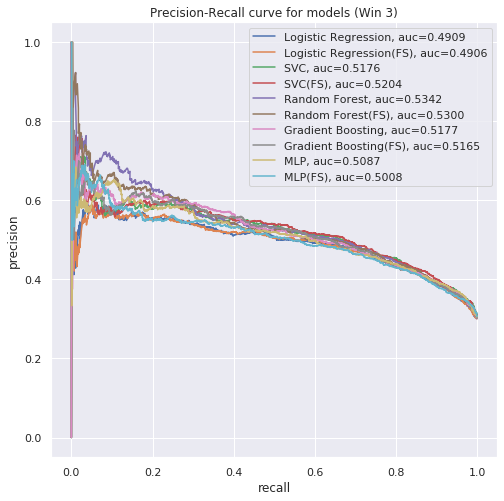

In [0]:
from matplotlib import pyplot as plt
plt.figure(figsize=(8,8))
plt.plot(recall_log,precision_log,label="Logistic Regression, auc=%.4f" %auc_log)
plt.plot(recall_log_fs,precision_log_fs,label="Logistic Regression(FS), auc=%.4f" %auc_log_fs)
plt.plot(recall_svc,precision_svc,label="SVC, auc=%.4f" %auc_svc)
plt.plot(recall_svc_fs,precision_svc_fs,label="SVC(FS), auc=%.4f" %auc_svc_fs)
plt.plot(recall_rf,precision_rf,label="Random Forest, auc=%.4f" %auc_rf)
plt.plot(recall_rf_fs,precision_rf_fs,label="Random Forest(FS), auc=%.4f" %auc_rf_fs)
plt.plot(recall_gb,precision_gb,label="Gradient Boosting, auc=%.4f" %auc_gb)
plt.plot(recall_gb_fs,precision_gb_fs,label="Gradient Boosting(FS), auc=%.4f" %auc_gb_fs)
plt.plot(recall_nn,precision_nn,label="MLP, auc=%.4f" %auc_nn)
plt.plot(recall_nn_fs,precision_nn_fs,label="MLP(FS), auc=%.4f" %auc_nn_fs)
plt.legend(loc=1)
plt.title('Precision-Recall curve for models (Win 3)')
plt.xlabel('recall')
plt.ylabel('precision')
plt.show()

## 5. Best Model

Best model according to AUPRC is Random Forest without feature selection

### 5.1 Bias Variance Tradeoff

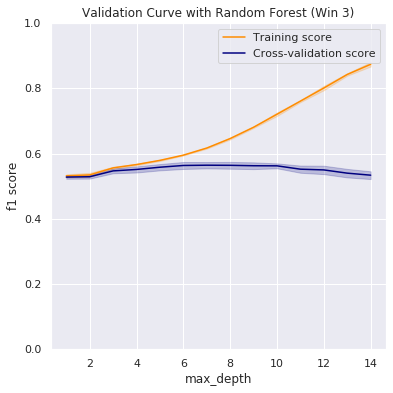

In [0]:
from sklearn.model_selection import validation_curve
from sklearn.ensemble import RandomForestClassifier
param_range = [i for i in range(1,15)]
param_name = "max_depth"
temp_model = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=5, n_estimators=50, class_weight='balanced_subsample')
train_scores, test_scores = validation_curve(temp_model, X_train, y_train, param_name, param_range, scoring='f1', cv=5)
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure(figsize=(6,6))
plt.title("Validation Curve with Random Forest (Win 3)")
plt.xlabel(param_name)
plt.ylabel("f1 score")
plt.ylim(0.0, 1.0)
plt.plot(param_range, train_scores_mean, label="Training score",
             color="darkorange")
plt.fill_between(param_range, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.2,
                 color="darkorange")
plt.plot(param_range, test_scores_mean, label="Cross-validation score",
             color="navy")
plt.fill_between(param_range, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.2,
                 color="navy")
plt.legend(loc="best")
plt.show()

### 5.2 Feature importance

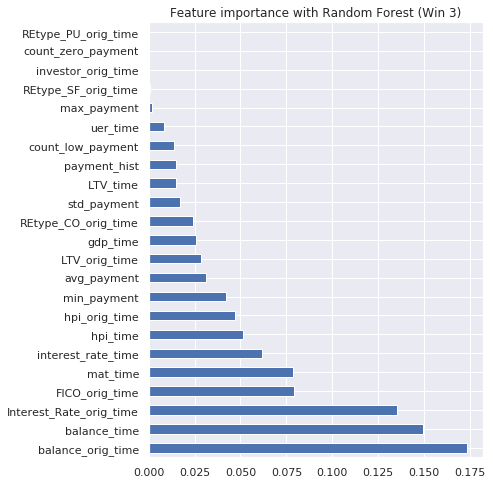

In [0]:
best = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=5, n_estimators=50, class_weight='balanced_subsample')
best.fit(X_train,y_train)
plt.figure(figsize=(6,8))
feat_importances = pd.Series(best.feature_importances_, index=x_feature)
feat_importances.nlargest(23).plot(kind='barh')
plt.title("Feature importance with Random Forest (Win 3)")
plt.show()

### 5.3 Test result

In [0]:
from sklearn.metrics import classification_report, auc, precision_recall_curve
y_pred_best = best.predict(X_test)
y_pred_proba_best = best.predict_proba(X_test)[::,1]
precision_best, recall_best, thresholds_best = precision_recall_curve(y_test, y_pred_proba_best)
auc_best = auc(recall_best, precision_best)

print(classification_report(y_test, y_pred_best))
print('F1 score:', f1_score(y_test,y_pred_best))
print('Precision:', precision_score(y_test,y_pred_best))
print('Recall:', recall_score(y_test,y_pred_best))
print('AUPRC:', auc_best)
print('Accuracy:', accuracy_score(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.83      0.63      0.72      1364
           1       0.44      0.69      0.54       574

    accuracy                           0.65      1938
   macro avg       0.63      0.66      0.63      1938
weighted avg       0.71      0.65      0.66      1938

F1 score: 0.5366847826086957
Precision: 0.4398663697104677
Recall: 0.6881533101045296
AUPRC: 0.5015928004679389
Accuracy: 0.6480908152734778


### 5.4 Learning curve

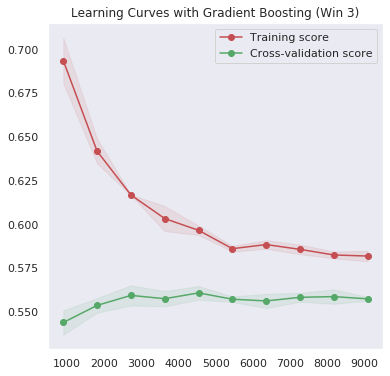

In [0]:
from sklearn.model_selection import learning_curve
from sklearn.utils import shuffle
X_train, y_train = shuffle(X_train, y_train, random_state=1211)
temp_model = RandomForestClassifier(random_state=1211, oob_score=True, max_depth=5, n_estimators=50, class_weight='balanced_subsample')
train_sizes, train_scores, test_scores = learning_curve(temp_model, X_train, y_train, train_sizes=np.linspace(.1, 1.0, 10),scoring='f1')
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
_, ax = plt.subplots(1, 1, figsize=(6, 6))
ax.grid()
ax.set_title('Learning Curves with Gradient Boosting (Win 3)')
ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
ax.legend(loc="best")
